In [ ]:
"""!pip install pymongo
!pip install requests
!pip install polars
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install h2o"""

In [ ]:
import mondongo
import cleanfiles
import eda
import transforms
import dbSQL
import model

# Settings para evitar el __pycache__
import sys
sys.dont_write_bytecode = True

In [3]:
mondongo.upload_data()

Descargando CSV desde: https://media.githubusercontent.com/media/moonlightKiR/GTD/refs/heads/main/global_terrorism_data.csv...
CSV descargado correctamente.
Transformando CSV a JSON (Streaming)...
Archivo JSON creado correctamente.
Borrando coleccion existente...
Conectado a MongoDB.
Subiendo registros...
   - 5000 registros subidos...
   - 10000 registros subidos...
   - 15000 registros subidos...
   - 20000 registros subidos...
   - 25000 registros subidos...
   - 30000 registros subidos...
   - 35000 registros subidos...
   - 40000 registros subidos...
   - 45000 registros subidos...
   - 50000 registros subidos...
   - 55000 registros subidos...
   - 60000 registros subidos...
   - 65000 registros subidos...
   - 70000 registros subidos...
   - 75000 registros subidos...
   - 80000 registros subidos...
   - 85000 registros subidos...
   - 90000 registros subidos...
   - 95000 registros subidos...
   - 100000 registros subidos...
   - 105000 registros subidos...
   - 110000 registro

In [4]:
cleanfiles.clean_files()

In [5]:
df = eda.get_dataframe()

Conectando a MongoDB para extraer datos...
DataFrame creado con exito: 181691 filas y 136 columnas.


Analizando calidad del dato (Nulos y Vacios)...

Se han detectado 106 columnas con datos faltantes.
Top 100 variables con mas nulos/vacios:
 - gsubname3: 181671 faltantes (99.99%)
 - weapsubtype4: 181621 faltantes (99.96%)
 - weapsubtype4_txt: 181621 faltantes (99.96%)
 - weaptype4: 181618 faltantes (99.96%)
 - weaptype4_txt: 181618 faltantes (99.96%)
 - claimmode3: 181558 faltantes (99.93%)
 - claimmode3_txt: 181558 faltantes (99.93%)
 - gsubname2: 181531 faltantes (99.91%)
 - claim3: 181373 faltantes (99.82%)
 - guncertain3: 181371 faltantes (99.82%)
 - gname3: 181367 faltantes (99.82%)
 - divert: 181367 faltantes (99.82%)
 - attacktype3: 181263 faltantes (99.76%)
 - attacktype3_txt: 181263 faltantes (99.76%)
 - ransomnote: 181177 faltantes (99.72%)
 - ransompaidus: 181139 faltantes (99.70%)
 - ransomamtus: 181128 faltantes (99.69%)
 - claimmode2: 181075 faltantes (99.66%)
 - claimmode2_txt: 181075 faltantes (99.66%)
 - ransompaid: 180917 faltantes (99.57%)
 - corp3: 180665 faltantes

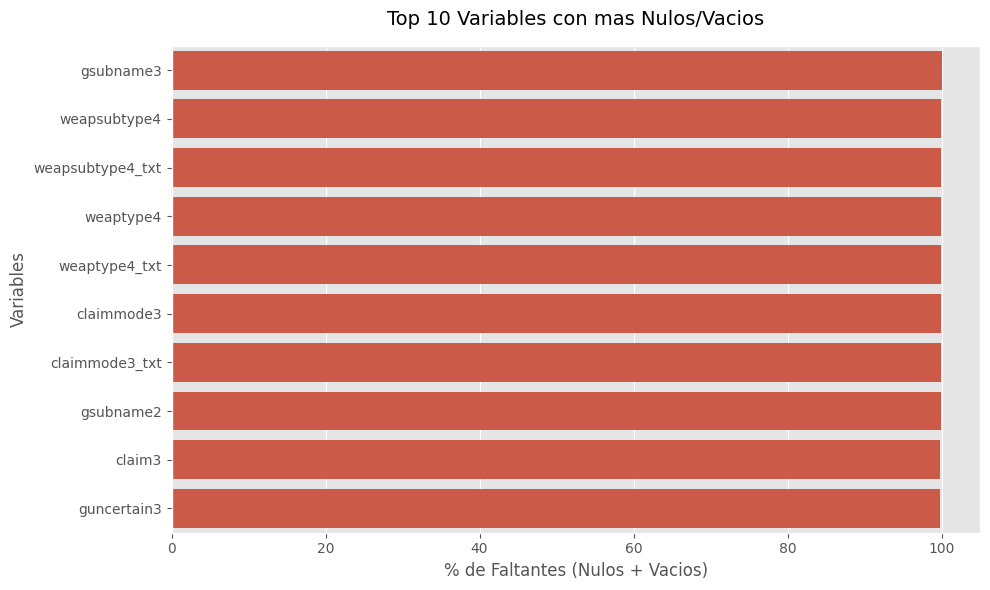

In [6]:
missing_col = eda.analyze_data_quality(df)

In [7]:
missing_col

['gsubname3',
 'weapsubtype4',
 'weapsubtype4_txt',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3',
 'natlty3_txt',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype3',
 'weaptype3_txt',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'target2',
 'targtype2',
 'targtype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode',
 'claimmode_txt',
 'rela

Todas esas columnas tienen un dato vacío o algún nulo

In [8]:
eda.check_duplicates(df)

Analizando duplicados...
Analisis de duplicados en 'eventid': 0 encontrados.


0

No hay ningún valor duplicado

In [9]:
df.describe()

statistic,_id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,…,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""",…,"""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",…,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""698b907480be902390ad13e8""","""197000000001""","""1970""","""0""","""0""","""""","""0""","""""","""10""","""Afghanistan""","""1""","""Australasia & Oceania""","""""","""""","""""","""""","""""","""-9""","""""","""""","""0""","""0""","""0""","""""","""""","""""","""""","""0""","""0""","""1""","""Armed Assault""","""""","""""","""""","""""","""1""",…,"""""","""""","""""","""""","""""","""""","""-9""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""Anti-Abortion Project 2010""","""-9""","""-9""","""-9""","""-9""",""""""
"""25%

Analizando las columnas y su contenido vemos que realmente solo tenemos unas 35 columnas útiles

In [10]:
df_clean = eda.run_lazy_pipeline(df)

Iniciando Pipeline Lazy (Optimización de Polars)...
Ejecutando plan optimizado con .collect()...
Procesamiento Lazy finalizado: 22 columnas.


In [11]:
display(df_clean.null_count())

nkill,nwound,success,propvalue,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,gname,gsubname,attacktype1_txt,suicide,targtype1_txt,corp1,target1,weaptype1_txt,weapsubtype1_txt
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_clean.schema

Schema([('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Aquí procederemos a modificar el tipo de variable de unas columnas específicas, para que en lugar de estar en string, sean números

In [13]:
df_clean.schema

Schema([('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Y ahora procederemos con el mapeo de las columnas categóricas.

In [14]:
eda.list_categorical_uniques(df_clean)

Buscando valores únicos en columnas de texto...

Columna String: 'country_txt'
  Total únicos: 205
  Valores (Top 15): ['Poland', 'France', 'Seychelles', 'Guatemala', 'Denmark', 'Sweden', 'South Korea', 'Saudi Arabia', 'Paraguay', 'Spain', 'Hong Kong', 'Benin', 'Brunei', 'Solomon Islands', 'Zambia']...

Columna String: 'region_txt'
  Total únicos: 12
  Valores: ['Australasia & Oceania', 'South America', 'Central America & Caribbean', 'South Asia', 'Western Europe', 'Eastern Europe', 'Sub-Saharan Africa', 'East Asia', 'Southeast Asia', 'North America', 'Middle East & North Africa', 'Central Asia']

Columna String: 'provstate'
  Total únicos: 2855
  Valores (Top 15): ['North West', 'Trat', 'Maribor', 'Montserrado', 'Sool', 'Mahajanga', 'Cherkasy', 'Cuscaltan', 'Narathiwat', 'Sidi Bel Abbes', 'Chlef  (Province)', 'Pailin', 'North Rhine-Westphalia', 'Bay of Plenty', 'Alexandria (Governorate)']...

Columna String: 'city'
  Total únicos: 36674
  Valores (Top 15): ['Offenbach', 'Frontino', 'B

{'country_txt': ['Poland',
  'France',
  'Seychelles',
  'Guatemala',
  'Denmark',
  'Sweden',
  'South Korea',
  'Saudi Arabia',
  'Paraguay',
  'Spain',
  'Hong Kong',
  'Benin',
  'Brunei',
  'Solomon Islands',
  'Zambia',
  'Montenegro',
  'Sierra Leone',
  'Yugoslavia',
  'St. Lucia',
  'Argentina',
  'Mali',
  'Uganda',
  'Brazil',
  'Serbia-Montenegro',
  'Colombia',
  'Russia',
  'Macau',
  'Estonia',
  'Hungary',
  'Somalia',
  'New Hebrides',
  'Guinea-Bissau',
  'Portugal',
  'Cuba',
  'Kazakhstan',
  'Gambia',
  'Falkland Islands',
  'Bhutan',
  'Andorra',
  'Germany',
  'Liberia',
  'New Caledonia',
  'Togo',
  'Soviet Union',
  'Mexico',
  'Malta',
  'Angola',
  'South Sudan',
  'Latvia',
  'West Germany (FRG)',
  'El Salvador',
  'Macedonia',
  'Chad',
  'Comoros',
  'Iran',
  'Ivory Coast',
  'Mauritania',
  'Albania',
  'East Germany (GDR)',
  'East Timor',
  'Martinique',
  'Azerbaijan',
  'South Yemen',
  'Croatia',
  'Algeria',
  'Bulgaria',
  'French Guiana',
  'Et

Con esas columnas que sabemos que son tipo string, vamos a codificarlas a numérico conservando el mapeo.

In [15]:
df_num, mis_mapeos = eda.encode_categorical_columns(df_clean)

Codificando columnas detectadas como texto: ['country_txt', 'region_txt', 'provstate', 'city', 'gname', 'gsubname', 'attacktype1_txt', 'suicide', 'targtype1_txt', 'corp1', 'target1', 'weaptype1_txt', 'weapsubtype1_txt']...
 - 'country_txt' codificado (205 categorías).
 - 'region_txt' codificado (12 categorías).
 - 'provstate' codificado (2856 categorías).
 - 'city' codificado (36675 categorías).
 - 'gname' codificado (3537 categorías).
 - 'gsubname' codificado (1184 categorías).
 - 'attacktype1_txt' codificado (9 categorías).
 - 'suicide' codificado (2 categorías).
 - 'targtype1_txt' codificado (22 categorías).
 - 'corp1' codificado (33242 categorías).
 - 'target1' codificado (86009 categorías).
 - 'weaptype1_txt' codificado (12 categorías).
 - 'weapsubtype1_txt' codificado (31 categorías).


In [16]:
df_clean.schema

Schema([('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

In [25]:
df_num.schema

Schema([('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', Int64),
        ('region_txt', Int64),
        ('provstate', Int64),
        ('city', Int64),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', Int64),
        ('gsubname', Int64),
        ('attacktype1_txt', Int64),
        ('suicide', Int64),
        ('targtype1_txt', Int64),
        ('corp1', Int64),
        ('target1', Int64),
        ('weaptype1_txt', Int64),
        ('weapsubtype1_txt', Int64)])

Para poder trabajar con h2o, este solo acepta dataframes de pandas, por lo tanto creamos una funcion para convertir el dataframe de polars a pandas.

In [17]:
df_pandas = transforms.convert_to_pandas(df_num)

Iniciando conversión de Polars a Pandas...
Conversión exitosa. DataFrame de Pandas listo con 181691 registros.


In [18]:
df_pandas

,nkill,nwound,success,propvalue,iyear,imonth,iday,country_txt,region_txt,provstate,...,longitude,gname,gsubname,attacktype1_txt,suicide,targtype1_txt,corp1,target1,weaptype1_txt,weapsubtype1_txt
0,1,0,1,0.0,1970,7,2,55,7,NaN,...,-69.951164,1948,NaN,0,0,15,NaN,52051.0,1,NaN
1,0,0,1,0.0,1970,0,0,83,11,2173.0,...,-99.086624,2006,NaN,2,0,5,253.0,58903.0,1,NaN
2,1,0,1,0.0,1970,1,0,181,3,2069.0,...,120.599741,1745,NaN,0,0,3,19287.0,24946.0,1,NaN
3,0,0,1,0.0,1970,1,0,25,10,2544.0,...,23.762728,1745,NaN,7,0,5,NaN,21617.0,10,2.0
4,0,0,1,0.0,1970,1,0,129,4,2669.0,...,130.396361,1745,NaN,8,0,5,NaN,15095.0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,1,2,1,0.0,2017,12,31,103,9,1577.0,...,45.385034,1559,NaN,4,0,13,31445.0,50511.0,0,21.0
181687,2,7,1,-99.0,2017,12,31,148,1,1071.0,...,35.942679,2071,NaN,7,0,13,13074.0,68457.0,10,8.0
181688,0,0,1,-99.0,2017,12,31,181,3,291.0,...,124.437908,1087,NaN,8,0,15,17151.0,54739.0,5,19.0
181689,0,0,0,0.0,2017,12,31,151,2,1832.0,...,93.940430,1745,NaN,7,0,9,24551.0,30747.0,10,0.0


Seguidamente de haber realizado este eda, haremos

Aquí obteniendo nuestro dataframe en pandas, ya que si lo hacemos con polars, este no funciona porque h2o no acepta dataframes en polars.

In [19]:
hf = model.init(df_pandas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "23.0.2" 2025-01-21; Java(TM) SE Runtime Environment (build 23.0.2+7-58); Java HotSpot(TM) 64-Bit Server VM (build 23.0.2+7-58, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmp3up1vpun
  JVM stdout: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmp3up1vpun/h2o_guille_started_from_python.out
  JVM stderr: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmp3up1vpun/h2o_guille_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_guille_4zgea8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.484 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
predictors, classification_target, regression_target, hf = model.split_data(hf)

In [21]:
train,test = model.divide_data(hf)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Accuracy (default threshold): 0.9369
Accuracy (threshold max F1): 0.9369
AUC: 0.9276
F1: [[0.8515654284809604, 0.965115569921327]]
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8515654284809604
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      2345  1669   0.4158   (1669.0/4014.0)
1      619   31650  0.0192   (619.0/32269.0)
Total  2964  33319  0.0631   (2288.0/36283.0)

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


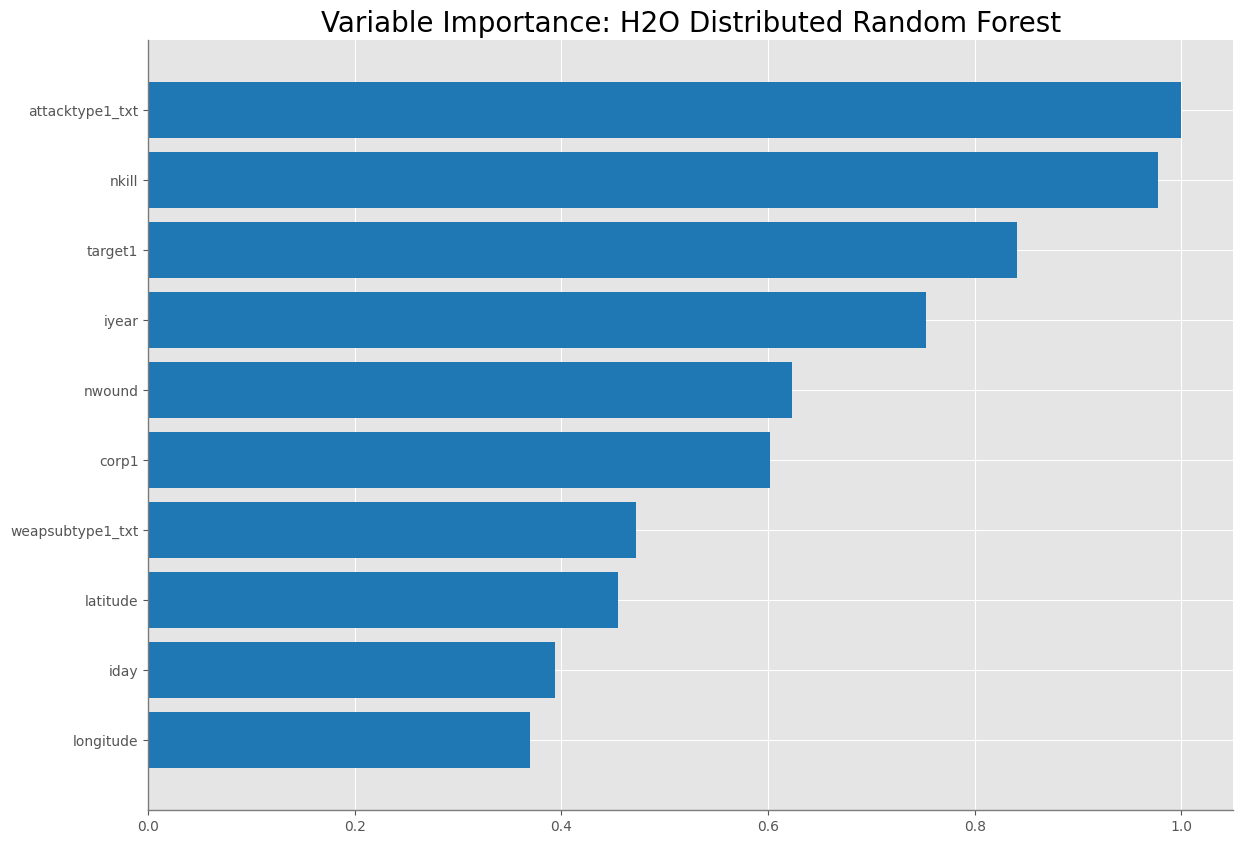

Graficando Curva ROC...


<Figure size 640x480 with 0 Axes>

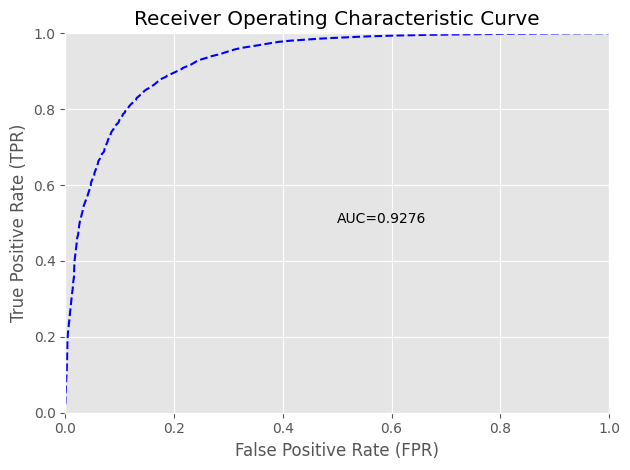

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1770754176343_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          5.5879e+06             20           20           20            6826          10338         8610.3

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.10157791430262264
RMSE: 0.31871290262965923
LogLoss: 0.29625787596074993
Mean Per-Class Error: 0.02039889896820309
AUC: 0.9966353235296543
AUCPR: 0.9972935178319994
Gini: 0.9932706470593087

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8709359427653867
       0       1       Error    Rate
-----  ------  ------  -------  -----------------
0      127842  1544    0.0119   (1544.0/129386.0)
1      3734    125629  0.0289   (3734.0/129363.0)
Total  131576  127173  0.0204   (5278.0/258749.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.870936     0.979426  76
max f2                       0.818088     0.980308  93
max f0point5                 0.892506     0.986648  69
max accuracy                 0.870936     0.979602  76
max precision                0.999933     1         0
max recall                   4.14286e-05  1         399
max specificity              0.999933     1         0
max absolute_mcc             0.870936     0.959341  76
max min_per_class_accuracy   0.847963     0.977671  84
max mean_per_class_accuracy  0.870936     0.979601  76
max tns                      0.999933     129386    0
max fns                      0.999933     117686    0
max fps                      4.14286e-05  129386    399
max tps                      4.14286e-05  129363    399
max tnr                      0.999933     1         0
max fnr                      0.999933     0.909735  0
max fpr                      4.14286e-05  1         399
max tpr                      4.14286e-05  1         399

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 66.54 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0300716                   1                  2.00018     2.00018            1                1          1                           1                   0.0601486       0.0601486                  100.018   100.018            0.0601486
2        0.0400002                   0.999765           2.00018     2.00018            1                0.99988    1                           0.99997             0.0198588       0.0800074                  100.018   100.018            0.0800074
3        0.0500021                   0.999494           2.00018     2.00018            1                0.99963    1                           0.999902            0.0200057       0.100013                   100.018   100.018            0.100013
4        0.1                         0.997418           2.00018     2.00018            1                0.998555   1                           0.999228            0.100005        0.200019                   100.018   100.018            0.200019
5        0.150003                    0.994317           2.00018     2.00018            1                0.99591

In [22]:
model.classify_h2o(train, test, predictors, classification_target)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R^2: 0.3966
RMSE: 3.5248
MAE: 2.4387

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


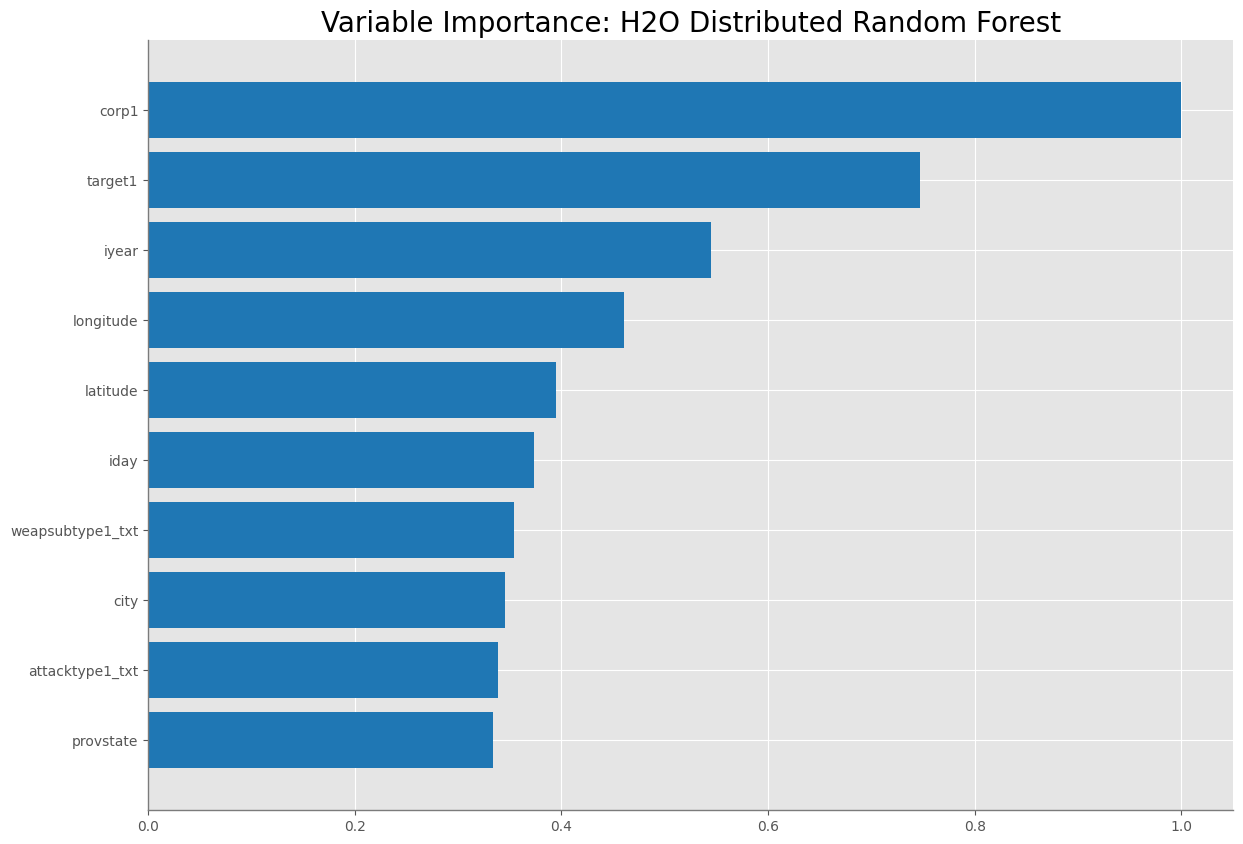

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1770754176343_25


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.34581e+07            20           20           20            17318         22385         19858.5

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 12.597478424825558
RMSE: 3.5492926654230077
MAE: 2.4424888002621397
RMSLE: 0.3832035086344873
Mean Residual Deviance: 12.597478424825558

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2026-02-10 21:09:50  0.167 sec   0                  nan              nan             nan
    2026-02-10 21:09:50  0.582 sec   1                  4.67393          2.91775         21.8456
    2026-02-10 21:09:50  0.892 sec   2                  4.55557          2.90254         20.7532
    2026-02-10 21:09:51  1.258 sec   3                  4.42497          2.83885         19.5803
    2026-02-10 21:09:51  1.537 sec   4                  4.31479          2.81343         18.6174
    2026-02-10 21:09:51  1.789 sec   5                  4.20938          2.75866         17.7189
    2026-02-10 21:09:52  2.052 sec   6                  4.12457          2.71376         17.0121
    2026-02-10 21:09:52  2.361 sec   7                  4.04712          2.67622         16.3792
    2026-02-10 21:09:52  2.639 sec   8                  3.98667          2.64767         15.8935
    2026-02-10 21:09:52  2.910 sec   9                  3.93747          2.63388         15.5037
    2026-02-10 21:09:53  3.198 sec   10                 3.88768          2.61098         15.114
    2026-02-10 21:09:53  3.530 sec   11                 3.84761          2.59417         14.8041
    2026-02-10 21:09:53  3.820 sec   12                 3.82203          2.58319         14.6079
    2026-02-10 21:09:54  4.069 sec   13                 3.78966          2.56564         14.3615
    2026-02-10 21:09:58  8.181 sec   28                 3.60877          2.47529         13.0232
    2026-02-10 21:10:02  12.395 sec  44                 3.55875          2.44742         12.6647
    2026-02-10 21:10:03  13.969 sec  50                 3.54929          2.44249         12.5975

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
corp1             9.96576e+06            1                    0.145757
target1           7.44025e+06            0.746581             0.108819
iyear             5.43104e+06            0.54497              0.079433
longitude         4.59448e+06            0.461027             0.0671978
latitude          3.93118e+06            0.394469             0.0574965
iday              3.72242e+06            0.373521             0.0544433
weapsubtype1_txt  3.53006e+06            0.354219             0.0516298
city              3.44275e+06            0.345457             0.0503527
attacktype1_txt   3.37187e+06            0.338345             0.0493161
provstate         3.33071e+06            0.334215             0.0487141
region_txt        3.23522e+06            0.324633             0.0473175
gname             3.20959e+06            0.322062             0.0469426
imonth            3.18279e+06            0.319372             0.0465506
nkill             2.78543e+06            0.279499             0.0407389
country_txt       2.67502e+06            0.268421             0.0391241
nwound            1.56234e+06            0.156771             0.02

<Figure size 640x480 with 0 Axes>

In [23]:
model.regression_h2o(train, test, predictors, regression_target)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R²: 0.5086523691310365
MSE: 0.04834430976288304
RMSE: 0.21987339485004329

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


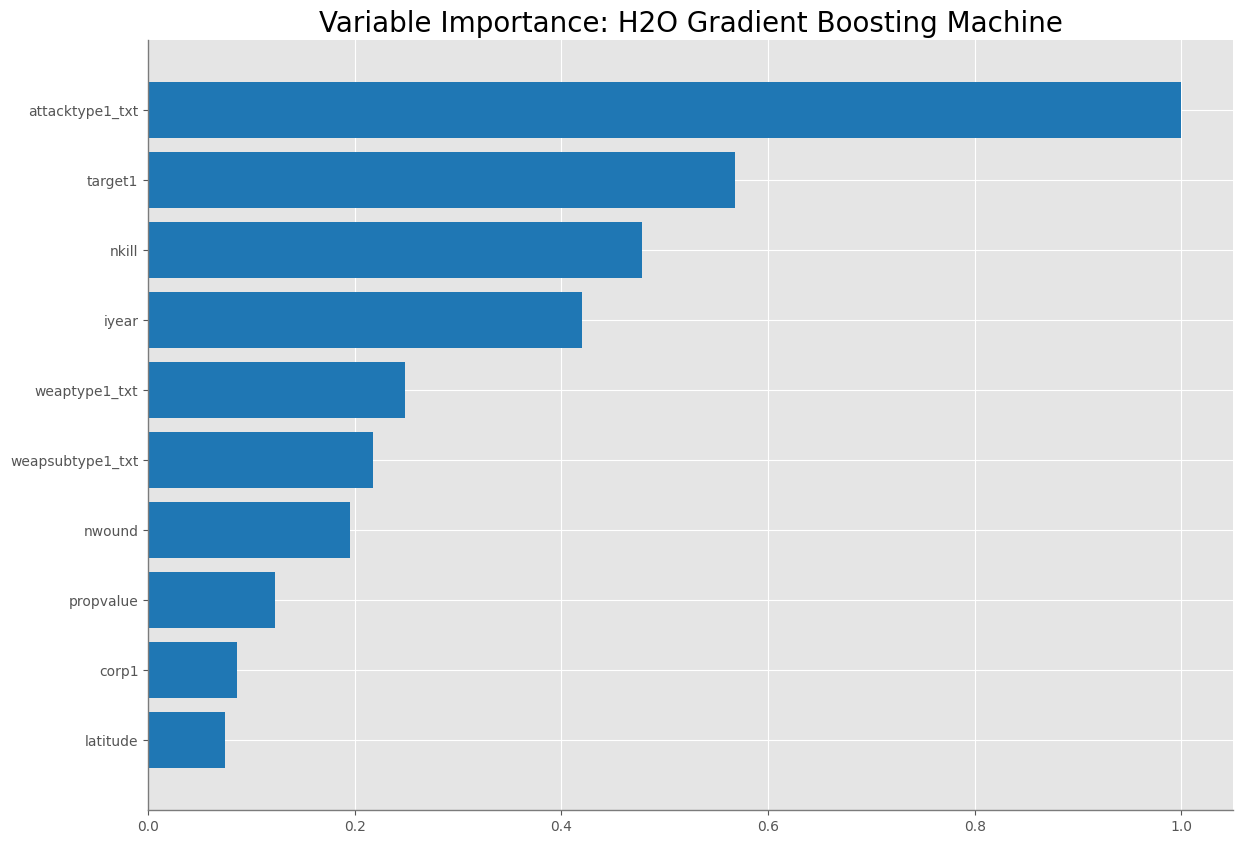

Graficando Curva ROC...


<Figure size 640x480 with 0 Axes>

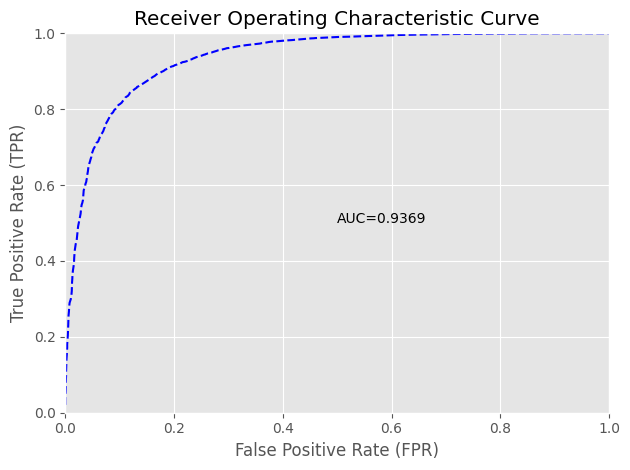

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1770754176343_26


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    200                200                         87353                  5            5            5             12            32            28.58

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0453656706375583
RMSE: 0.21299218445182044
LogLoss: 0.16200799333579027
Mean Per-Class Error: 0.20097036906640176
AUC: 0.9462152778834184
AUCPR: 0.9917630932365528
Gini: 0.8924305557668368

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6117082774106938
       0      1       Error    Rate
-----  -----  ------  -------  -----------------
0      9866   6179    0.3851   (6179.0/16045.0)
1      2178   127185  0.0168   (2178.0/129363.0)
Total  12044  133364  0.0575   (8357.0/145408.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.611708     0.968191  227
max f2                       0.301849     0.982487  313
max f0point5                 0.808261     0.966291  157
max accuracy                 0.631131     0.942534  222
max precision                0.999349     1         0
max recall                   0.0265926    1         391
max specificity              0.999349     1         0
max absolute_mcc             0.674536     0.686139  207
max min_per_class_accuracy   0.884154     0.872282  115
max mean_per_class_accuracy  0.860735     0.874353  128
max tns                      0.999349     16045     0
max fns                      0.999349     126972    0
max fps                      0.00712954   16045     399
max tps                      0.0265926    129363    391
max tnr                      0.999349     1         0
max fnr                      0.999349     0.981517  0
max fpr                      0.00712954   1         399
max tpr                      0.0265926    1         391

Gains/Lift Table: Avg response rate: 88.97 %, avg score: 88.96 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100063                   0.999285           1.12403   1.12403            1                0.999514  1                           0.999514            0.0112474       0.0112474                  12.4031   12.4031            0.0112474
2        0.0200058                   0.998937           1.12403   1.12403            1                0.99911   1                           0.999312            0.0112397       0.0224871                  12.4031   12.4031            0.0224871
3        0.0300052                   0.998562           1.12326   1.12377            0.999312         0.998758  0.999771                    0.999128            0.011232        0.0337191                  12.3258   12.3773            0.0336567
4        0.0400047                   0.998102           1.12248   1.12345            0.998624         0.998338  0.999484                    0.99893             0.0112242       0.0449433                  12.2485   12.3451            0.0447563
5        0.0500041                   0.997628           1.12403   1.12357            1                0.997863  0.999587   

In [24]:
model.gradientBoost_h2o(train, test, predictors, classification_target)
